In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [78]:
data=pd.read_csv("../Dataset/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [79]:
data.shape

(284807, 31)

In [80]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [81]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [82]:
def standard(X_train,X_test,X_cv):
    mean=np.mean(X_train,axis=0)
    std=np.std(X_train,axis=0)
    std[std==0]=1
    X_train=(X_train-mean)/std
    X_test=(X_test-mean)/std
    X_cv=(X_cv-mean)/std

    return X_train,X_test,X_cv

In [83]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [84]:
X=data.drop(columns='Class').values
y=data['Class'].values

In [85]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.4,random_state=42)
X_test,X_cv,y_test,y_cv=train_test_split(X_val,y_val,test_size=0.2,random_state=42)
X_train_std,X_test_std,X_cv_std=standard(X_train,X_test,X_cv)

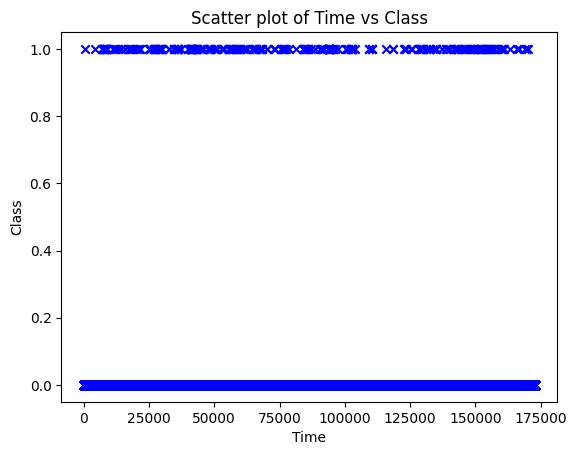

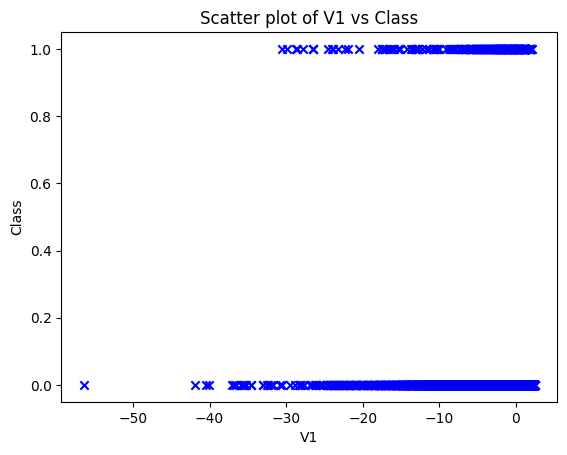

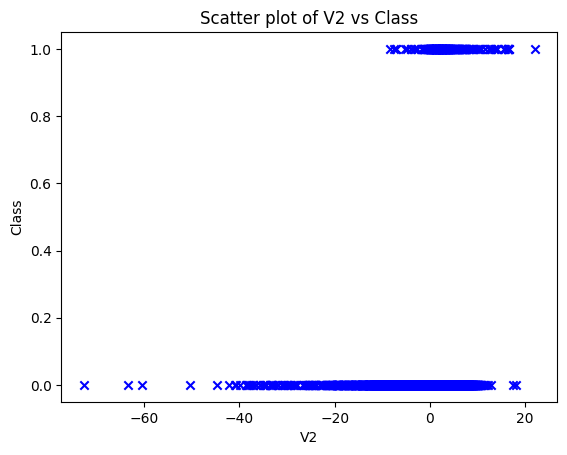

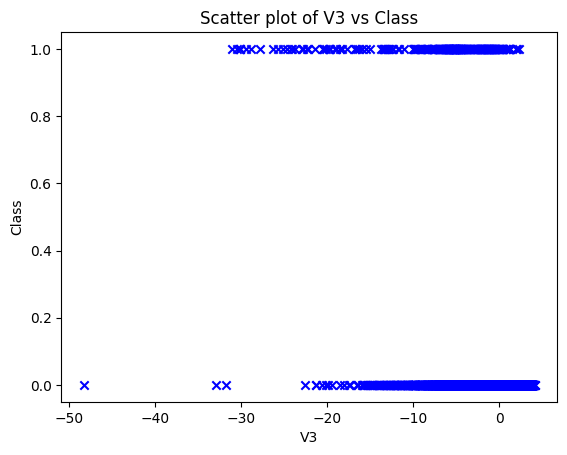

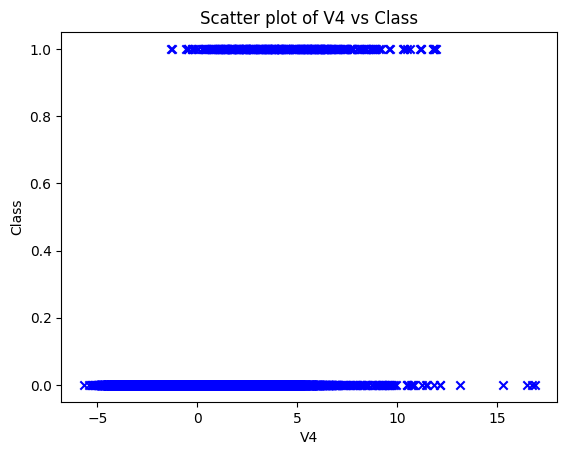

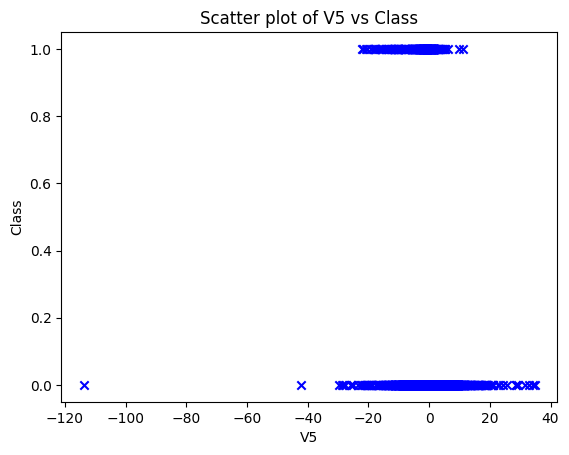

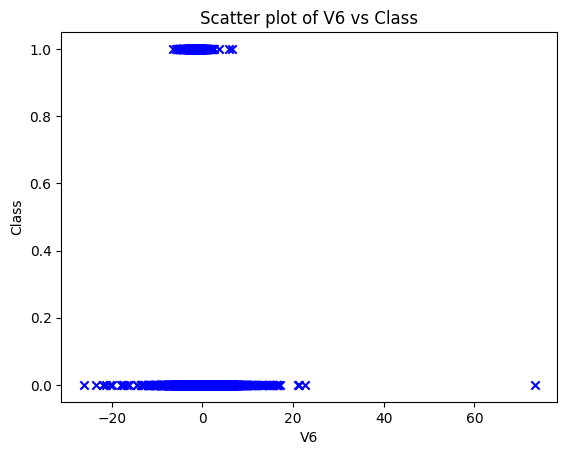

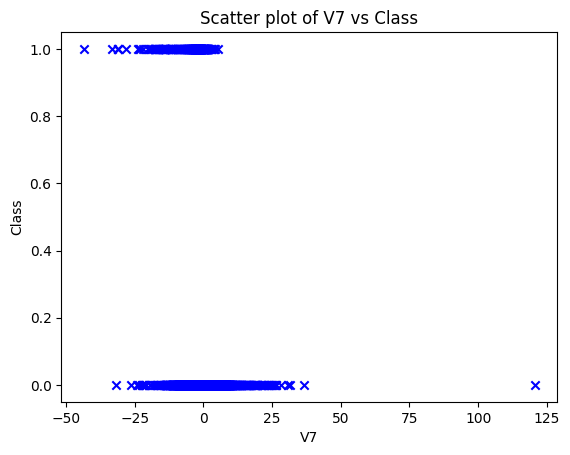

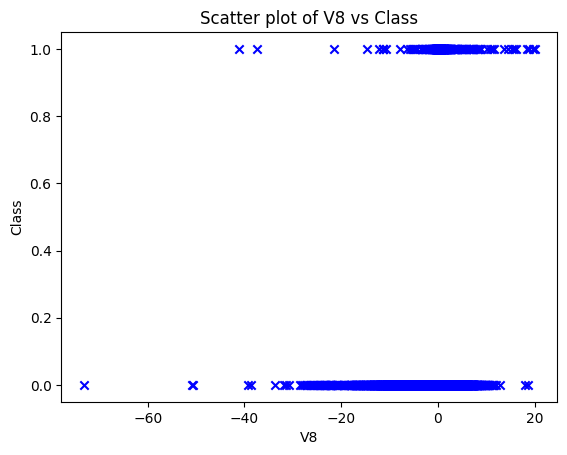

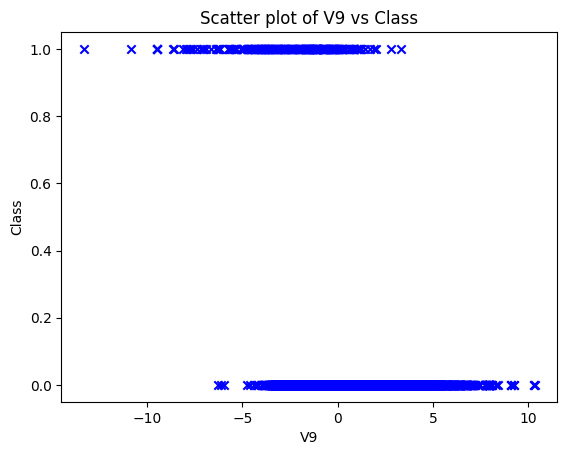

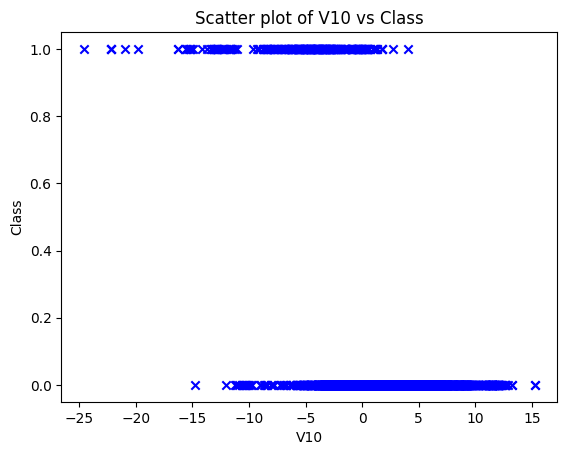

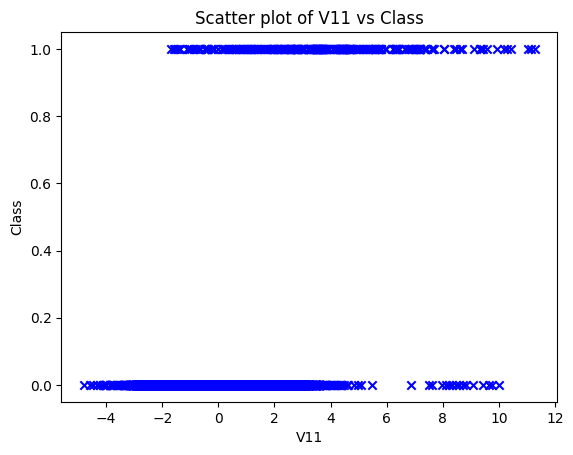

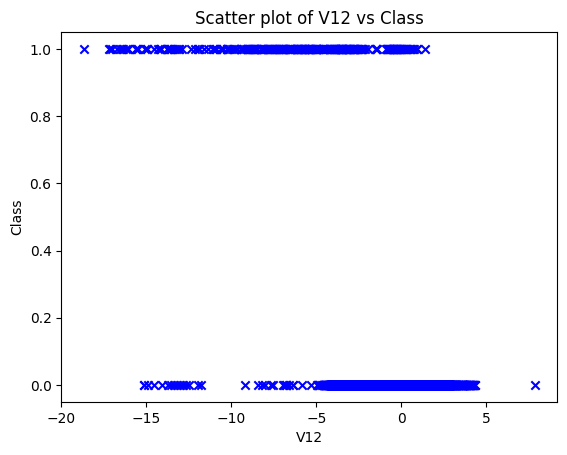

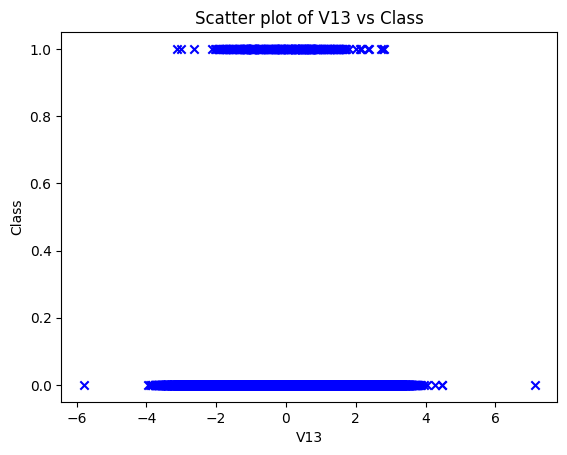

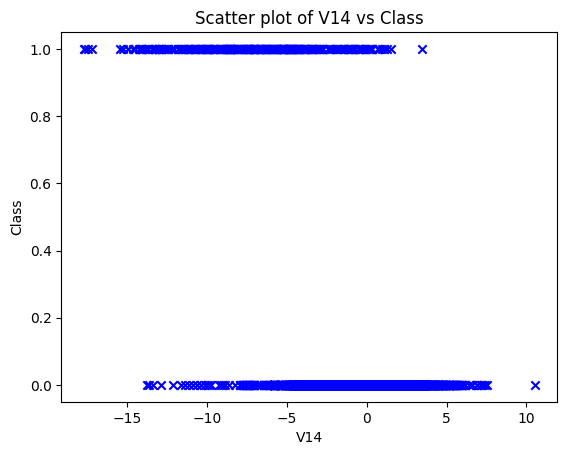

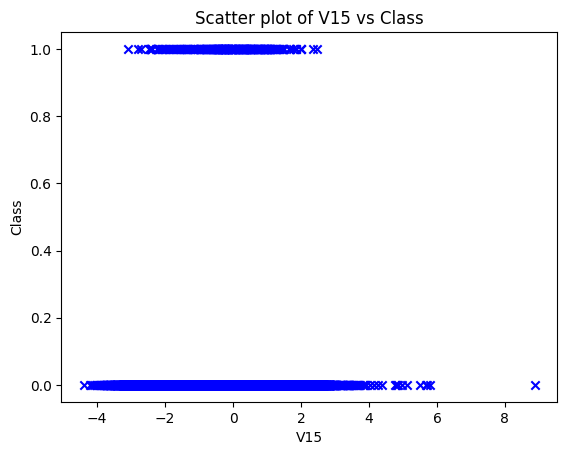

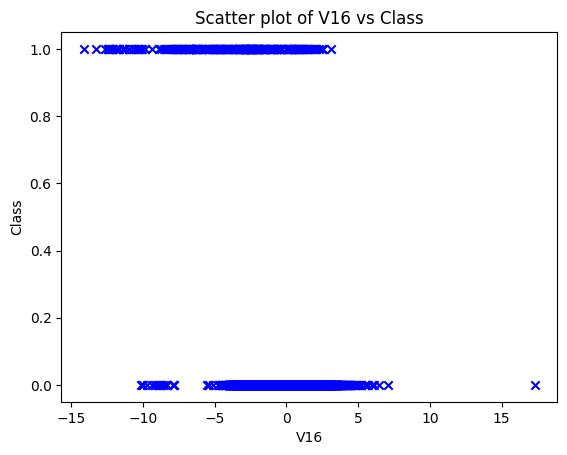

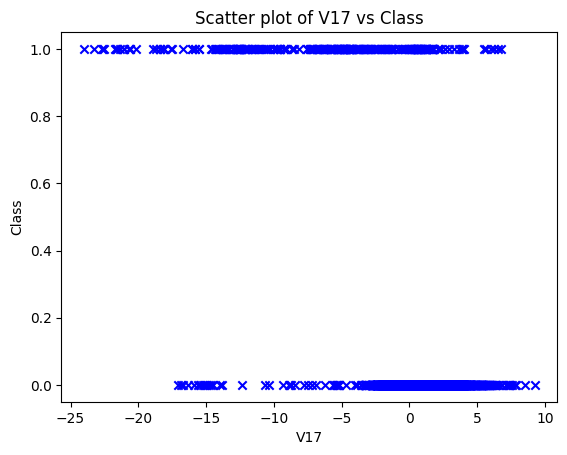

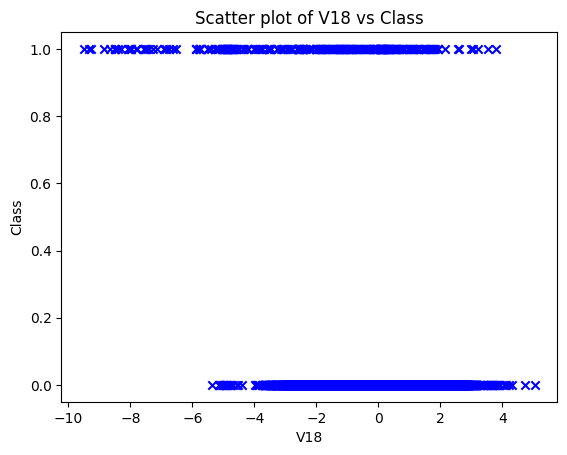

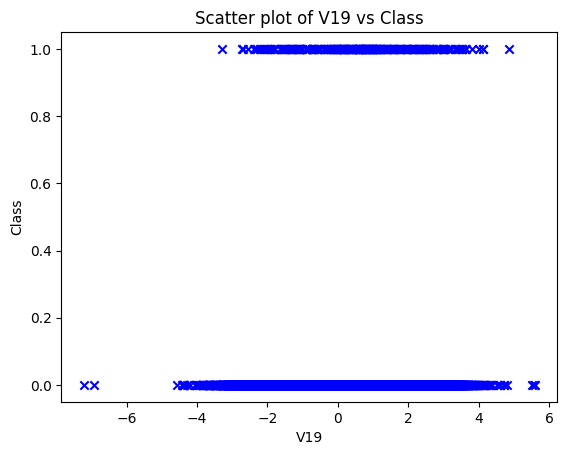

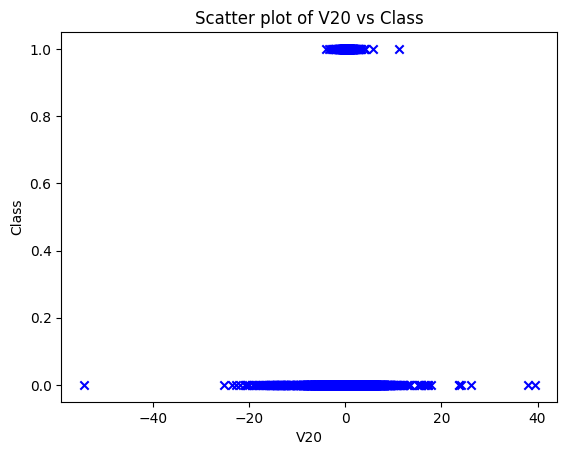

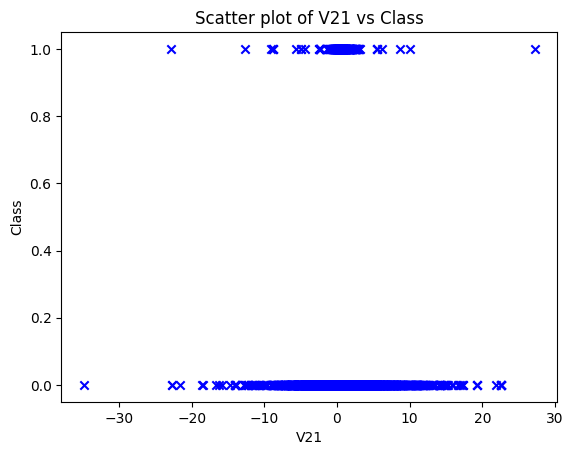

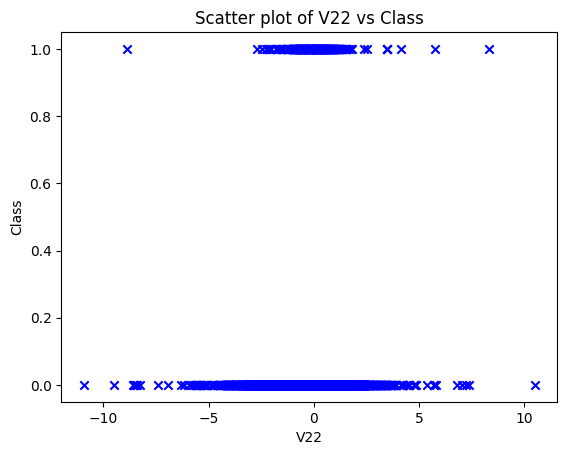

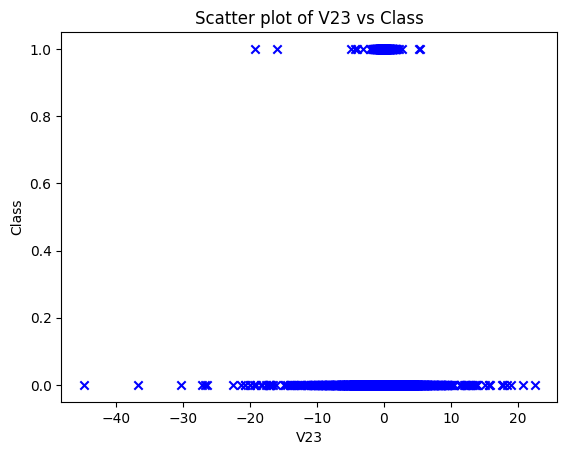

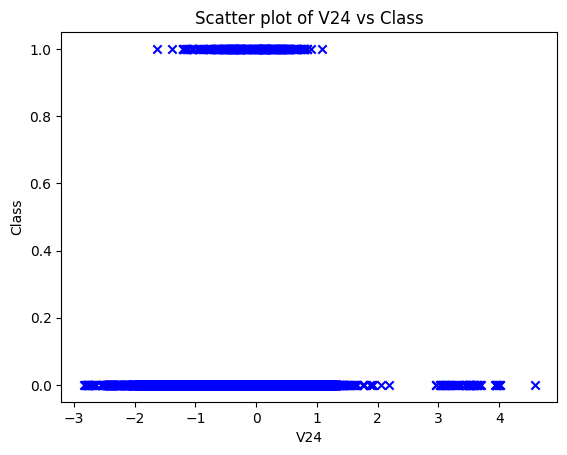

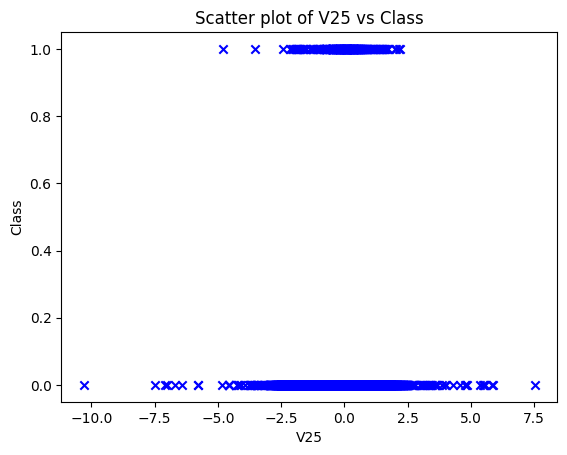

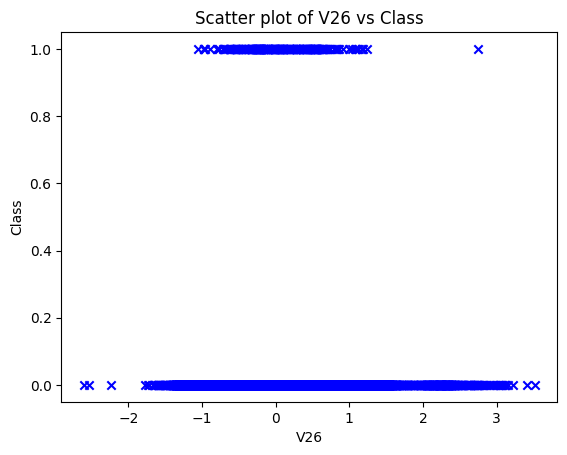

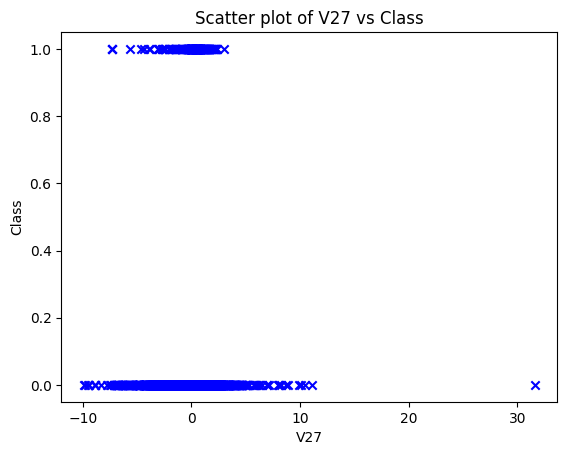

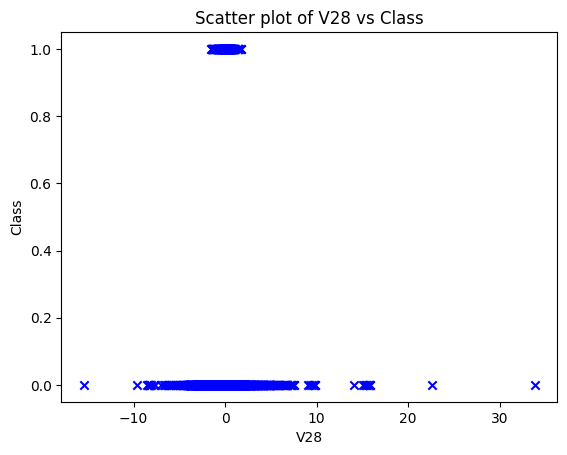

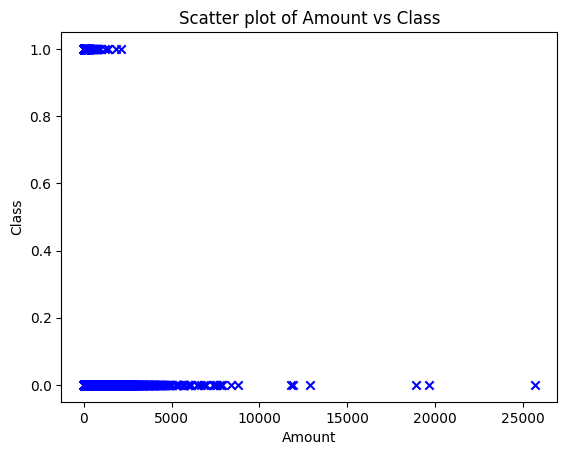

In [86]:
# Get feature names (excluding 'Class')
feature_names = data.drop(columns='Class').columns

for i in range(X_train.shape[1]):
    plt.scatter(X_train[:, i], y_train, marker='x', c='b')
    plt.xlabel(feature_names[i])
    plt.ylabel('Class')
    plt.title(f'Scatter plot of {feature_names[i]} vs Class')
    plt.show()

In [87]:
def estimate_gaussian(X):
    m,n=X.shape
    mean=np.mean(X,axis=0)
    var=np.var(X,axis=0)
    return mean,var


In [88]:
def multivariate_gaussain(X,mean,var):
    n=len(mean)
    p=(1/np.sqrt((2*np.pi)**n*np.prod(var)))*np.exp((-0.5)*np.sum(((X-mean)**2)/var,axis=1))
    return p

In [89]:
def select_threshold(y_true,y_pred):
    best_f1=0
    f1=0
    best_e=0
    step_size=(max(y_pred)-min(y_pred))/1000
    for epsilon in np.arange(min(y_pred),max(y_pred),step_size):
        pred=y_pred<epsilon
        tp=np.sum((pred==1) & (y_true==1))
        fp=np.sum((y_true==0) &(pred==1))
        fn=np.sum((y_true==1) &(pred==0))
        if tp + fp == 0 or tp + fn == 0:
            continue
        precision=tp/(tp+fp)
        recall=tp/(tp+fn)
        f1=(2*precision*recall)/(precision+recall)

        if f1>best_f1:
            best_f1=f1
            best_e=epsilon
    return best_e,best_f1




In [90]:
x_train_normal=X_train_std[y_train==0]


In [91]:
mu,var=estimate_gaussian(x_train_normal)
mu,var

(array([ 5.36041147e-04,  3.93069536e-03, -3.57673211e-03,  7.91095533e-03,
        -5.66375978e-03,  3.62870730e-03,  1.94452851e-03,  7.31414258e-03,
        -1.32337109e-03,  4.00745724e-03,  8.78206412e-03, -6.44873912e-03,
         1.08927774e-02,  6.95435414e-05,  1.26796211e-02,  1.98234504e-04,
         7.90529387e-03,  1.32128915e-02,  4.36873990e-03, -1.41142614e-03,
        -7.72726265e-04, -1.31374992e-03, -1.22835545e-04,  3.49648553e-04,
         2.69832681e-04, -5.35261466e-05, -2.56547878e-04, -6.58225666e-04,
        -3.81932427e-04, -2.27289570e-04]),
 array([0.99975019, 0.97312492, 0.98365339, 0.92859267, 0.97645727,
        0.96893193, 0.99680784, 0.91694582, 0.9631303 , 0.98368225,
        0.92428094, 0.96633963, 0.89904587, 0.99965447, 0.87677761,
        0.99950244, 0.93357756, 0.78885697, 0.97041761, 0.99429143,
        0.99695332, 0.97423726, 0.99694701, 0.98897672, 1.00048595,
        0.99703747, 0.99997646, 0.98187582, 0.99706147, 0.99993998]))

In [92]:
p_train=multivariate_gaussain(X_train_std,mu,var)
p_cv=multivariate_gaussain(X_cv_std,mu,var)
p_train,p_cv

(array([9.22461624e-16, 7.38672857e-19, 7.52486356e-19, ...,
        5.27964946e-14, 1.05408605e-20, 3.13712302e-15], shape=(170884,)),
 array([5.17189079e-16, 1.24658765e-17, 3.74438017e-17, ...,
        1.19625888e-15, 5.56867630e-20, 1.16641681e-80], shape=(22785,)))

In [93]:
print(p_cv.min(), p_cv.max())


0.0 1.2953870247218173e-13


In [95]:
p_cv.shape

(22785,)

In [94]:
epsilon,f1_score=select_threshold(y_cv,p_cv)
print("Best epsilon:", epsilon)
print("Best F1:", f1_score)

Best epsilon: 1.2953870247218172e-16
Best F1: 0.007002801120448179


In [97]:
p_test = multivariate_gaussain(X_test_std, mu, var)
y_pred_test = np.where(p_test < epsilon, 1, 0)

In [98]:
y_pred_test

array([0, 1, 1, ..., 1, 1, 1], shape=(91138,))

In [99]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       1.00      0.51      0.67     90987
           1       0.00      0.97      0.01       151

    accuracy                           0.51     91138
   macro avg       0.50      0.74      0.34     91138
weighted avg       1.00      0.51      0.67     91138

